In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from import_file import *
load_libs()

# US ASOS Dataset

## Combining Files

In [2]:
# file_dir, save_file_dir = 'DEN', './data/asos/denver_CO'
# file_dir, save_file_dir = 'GJT', './data/asos/grand_junction_CO'
# file_dir, save_file_dir = 'PUB', './data/asos/pueblo_CO'
# file_dir, save_file_dir = 'COS', './data/asos/colorado_springs_CO'

# file_dir, save_file_dir = 'BIS', 'D:/data/asos/bismarck_ND' # slight different shape on hour avg
# file_dir, save_file_dir = 'FAR', './data/asos/fargo_ND' # 
# file_dir, save_file_dir = 'GFK', './data/asos/grand_forks_ND' 
# file_dir, save_file_dir = 'ISN', 'D:/data/asos/williston_ND'

# file_dir, save_file_dir = 'OLM', 'D:/data/asos/olympia_WA', # strong directionality; change of speed shapre, high 0 when avg
# file_dir, save_file_dir = 'SEA', './data/asos/seattle_WA' # strong directionality
# file_dir, save_file_dir = 'UIL', 'D:/data/asos/quillayute_WA' 

# file_dir, save_file_dir = 'SPI', 'D:/data/asos/springfield_IL'
# file_dir, save_file_dir = 'ORD', 'D:/data/asos/chicago_ohare_IL' 

# file_dir, save_file_dir = 'ABR', './data/asos/aberdeen_SD' # only to 2012
# file_dir, save_file_dir = 'MSP', './data/asos/minneapolis_MN'
# file_dir, save_file_dir = 'LNK', './data/asos/lincoln_NE' # slight transformation on hourly avg
# file_dir, save_file_dir = 'DSM', './data/asos/des_moines_IA'
file_dir, save_file_dir = 'TOP' , 'D:/data/asos/topeka_KS' # high 0 when averaging

# file_dir, save_file_dir = 'BWI' , 'D:/data/asos/baltimore_MD' # slight high 0 after averaging

# file_dir, save_file_dir = 'ABE' , 'D:/data/asos/allentown_PA' 

In [3]:
# convert_type = 'hr_avg'
convert_type = '10min_avg'

In [4]:
from io import StringIO

fout = StringIO()
for year in range(2000,2017):
    for month in range(1,13):
        try: 
            for line in open('D:/1min采样间隔的数据/'+ str(year) + '/'+ file_dir +str(year)+"%02d"%(month)+".dat"):
                fout.write(line.replace("[", " ").replace("]", " ").replace('"', " ").replace('`', " "))
        except: 
            pass
all_data_file = fout.getvalue()
fout.close()

## Read from US 1 min

In [5]:
if file_dir in ["MSP", 'DEN', 'SEA', 'ORD']: 
    df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, error_bad_lines=False, sep=' ',
                    names = ['stationID','time','vis','day_type','vis2','day_type2','dir','speed','dir_max','speed_max','visual_range', 'unknown'])
elif  file_dir in ['BWI']:
    df= pd.read_csv(StringIO(all_data_file), skipinitialspace=True, error_bad_lines=False, sep=' ',
                names = ['stationID','time','vis','day_type','vis2','day_type2','dir','speed','dir_max','speed_max','visual_range', 'unknown2',  'unknown'])
else:
    df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, sep=' ', error_bad_lines=False,
                    names = ['stationID','time','vis','day_type','dir','speed','dir_max','speed_max','unname','visual_range', 'unknown'])

df

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,unname,visual_range,unknown
0,13996KTOP,TOP2000010100000600,0.093,N,176,3,165,4,NaN,NaN,NaN
1,13996KTOP,TOP2000010100010601,0.092,N,170,3,166,3,NaN,NaN,NaN
2,13996KTOP,TOP2000010100020602,0.093,N,168,3,162,3,NaN,NaN,NaN
3,13996KTOP,TOP2000010100030603,0.093,N,163,3,150,3,NaN,NaN,NaN
4,13996KTOP,TOP2000010100040604,0.093,N,150,2,136,2,NaN,NaN,NaN
5,13996KTOP,TOP2000010100050605,0.093,N,144,1,135,1,NaN,NaN,NaN
6,13996KTOP,TOP2000010100060606,0.094,N,135,1,108,1,NaN,NaN,NaN
7,13996KTOP,TOP2000010100070607,0.095,N,118,1,108,1,NaN,NaN,NaN
8,13996KTOP,TOP2000010100080608,0.095,N,117,1,137,1,NaN,NaN,NaN
9,13996KTOP,TOP2000010100090609,0.096,N,127,1,130,2,NaN,NaN,NaN


In [6]:
# Drop duplicate
df.drop_duplicates(subset='time', inplace=True)

# Drop too many field
df = df[df['unknown'].isnull()].copy()
df.drop('unknown', axis=1, inplace=True)

# Drop missing field
# Cannot use visual range, since some previous data lack of
df.dropna(subset=['vis', 'dir','speed','dir_max','speed_max'], inplace=True)

In [7]:
if file_dir in ["TOP"]:
    df = df[df['unname'].isnull()]
    df.drop('unname', axis=1, inplace=True)

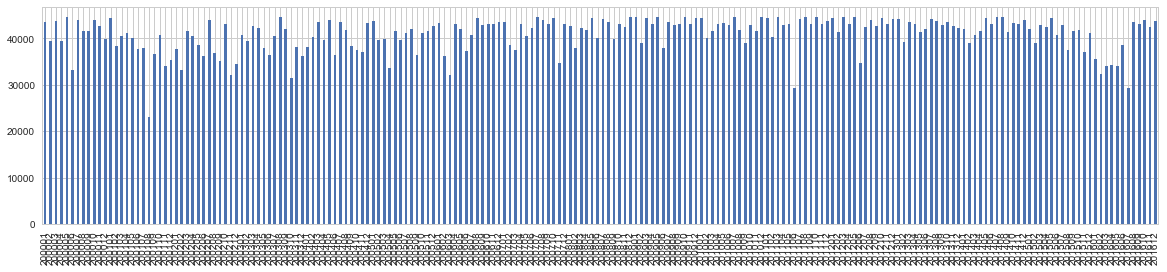

In [8]:
df['year_month'] = df['time'].apply(lambda x: x[3:9])
df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

0          2
1      23959
2      24393
3      23706
4      24692
5      23537
6      23203
7      22849
8      22735
9      21919
10     21875
11     21781
12     21380
13     21285
14     20915
15     20741
16     20531
17     20511
18     20050
19     20135
20     19583
21     19276
22     18922
23     18989
24     18670
25     18205
26     18042
27     17895
28     17472
29     17367
       ...  
331    24152
332    24429
333    24245
334    24184
335    24481
336    24207
337    24399
338    24484
339    24421
340    24662
341    24517
342    24761
343    24834
344    24691
345    24555
346    24507
347    24324
348    24343
349    24071
350    23969
351    24033
352    23661
353    23507
354    23560
355    23768
356    24066
357    24149
358    24217
359    23456
360    23991
Name: dir, Length: 361, dtype: int64

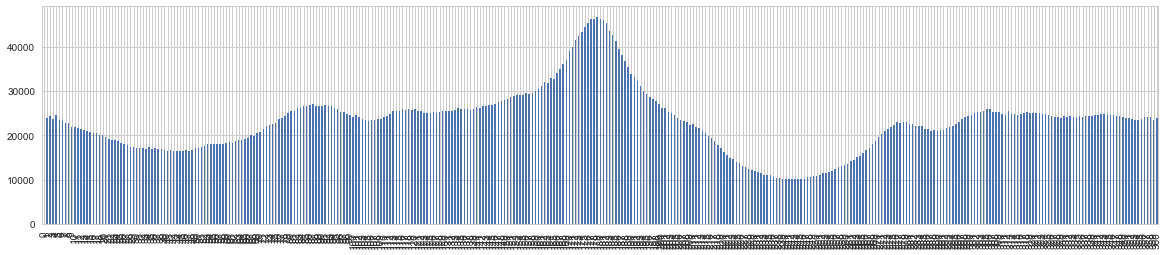

In [9]:
# Drop non-integer data for direction
df.dir = pd.to_numeric(df.dir, errors='coerce')  # Drop not a number
df = df[df.dir == df.dir // 1] # Drop not an integer
df = df[df['dir'].isin(arange(0,361))] # Drop not in range
df['dir'] = df['dir'].apply(lambda x: int(x)) # Convert back to integer
# Need to consider 0

display(df.dir.value_counts().sort_index())
df.dir.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

0       257986
1       619170
2       653493
3       692873
4       737739
5       743836
6       712044
7       658016
8       597216
9       529420
10      457771
11      387334
12      317850
13      254971
14      200420
15      153011
16      114064
17       83869
18       60003
19       42295
20       28420
21       18686
22       12424
23        7633
24        4612
25        2844
26        1792
27        1054
28         652
29         419
         ...  
39           1
40           3
41           1
43           1
45           1
46           1
48           1
49           1
51           1
170          1
199          1
265          1
811          1
818          1
838          1
921          1
1022         1
1042         1
1446         1
1533         1
1600         1
1827         1
1836         1
1844         1
1847         1
1909         1
1924         1
2151         1
2159         1
2215         1
Name: speed, Length: 69, dtype: int64

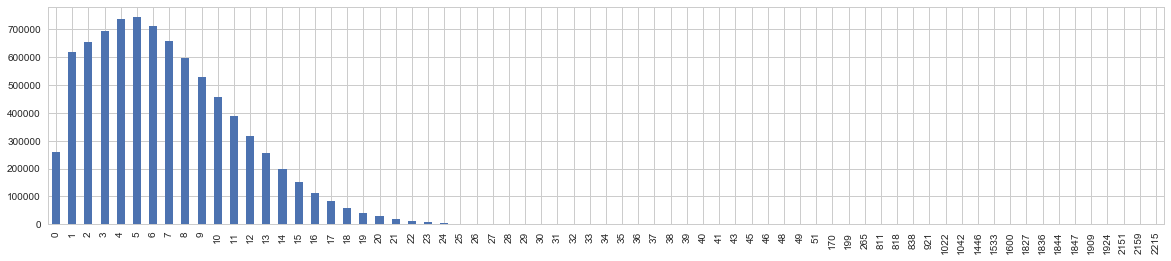

In [10]:
# Drop non-integer data for speed
df.speed = pd.to_numeric(df.speed, errors='coerce')
df = df[df.speed == df.speed // 1]
df['speed'] = df['speed'].apply(lambda x: int(x))

display(df.speed.value_counts().sort_index())
df.speed.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [11]:
df.query('(speed > 100) | (speed <0 )')

,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,visual_range,year_month
219012,13996KTOP,TOP2000061208451445,0.098,D,17,1446,0.100,D,NaN,200006
219063,13996KTOP,TOP2000061209581558,0.075,D,19,1600,0.081,D,NaN,200006
219762,13996KTOP,TOP2000061302360836,0.131,N,17,838,0.133,N,NaN,200006
220242,13996KTOP,TOP2000061313061906,0.096,D,17,1909,0.089,D,NaN,200006
220253,13996KTOP,TOP2000061313221922,0.096,D,16,1924,0.094,D,NaN,200006
220356,13996KTOP,TOP2000061315482148,0.094,D,17,2151,0.087,D,NaN,200006
221373,13996KTOP,TOP2000061412431843,0.055,D,28,1844,0.055,D,NaN,200006
222494,13996KTOP,TOP2000061510471647,0.054,D,16,170,13,148,NaN,200006
826074,13996KTOP,TOP2001091903180918,0.884,N,27,921,0.870,N,NaN,200109
826130,13996KTOP,TOP2001091904391039,0.885,N,27,1042,0.811,N,NaN,200109


In [12]:
df = df.query('(speed <= 100)  & (speed >= 0)')
df = df[df['day_type'].str.contains("D|N") == True]
df['vis']=pd.to_numeric(df['vis'], errors='coerce')
df = df.dropna(subset=['vis'])

display(df.query('speed == 0'))
# Drop Dir 0?
display(df.query('dir == 0'))

,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,visual_range,year_month
43,13996KTOP,TOP2000010100430643,0.105,N,60,0,133,0,NaN,200001
44,13996KTOP,TOP2000010100440644,0.107,N,110,0,175,1,NaN,200001
107,13996KTOP,TOP2000010101470747,0.118,N,72,0,125,0,NaN,200001
108,13996KTOP,TOP2000010101480748,0.116,N,84,0,127,1,NaN,200001
232,13996KTOP,TOP2000010103520952,0.202,N,116,0,98,0,NaN,200001
233,13996KTOP,TOP2000010103530953,0.213,N,96,0,77,1,NaN,200001
238,13996KTOP,TOP2000010103580958,0.210,N,88,0,50,1,NaN,200001
6825,13996KTOP,TOP2000010608361436,0.116,D,86,0,86,0,NaN,200001
6826,13996KTOP,TOP2000010608371437,0.113,D,86,0,86,0,NaN,200001
6827,13996KTOP,TOP2000010608381438,0.112,D,86,0,86,0,NaN,200001


,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,visual_range,year_month
348278,13996KTOP,TOP2000091311371737,0.086,D,0,9,166,10,NaN,200009
1464300,13996KTOP,TOP2003021317102310,0.190,D,0,8,92,9,NaN,200302


In [13]:
# [1, 360] -> [0, 360]
df['dir']=df['dir'].apply(lambda x: x%360 if x <= 360 else x)

In [14]:
df.sort_values(by='speed',ascending=False).head(10)

,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,visual_range,year_month
5688770,13996KTOP,TOP2011081822060406,0.341,N,19,51,25,57,NaN,201108
5688771,13996KTOP,TOP2011081822070407,0.268,N,26,49,28,59,NaN,201108
5688769,13996KTOP,TOP2011081822050405,0.364,N,8,48,3,61,NaN,201108
5688772,13996KTOP,TOP2011081822080408,0.209,N,25,46,29,51,NaN,201108
5688773,13996KTOP,TOP2011081822090409,0.183,N,27,45,36,55,NaN,201108
5688768,13996KTOP,TOP2011081822040404,0.289,N,9,43,7,59,NaN,201108
7292486,13996KTOP,TOP2014100119400140,69.770,N,309,41,294,57,NaN,201410
5688767,13996KTOP,TOP2011081822030403,0.243,N,17,40,16,54,NaN,201108
5688783,13996KTOP,TOP2011081822190419,2.617,N,35,40,35,49,NaN,201108
5688774,13996KTOP,TOP2011081822100410,0.184,N,27,40,20,47,NaN,201108


## Simple viz after data wrangling

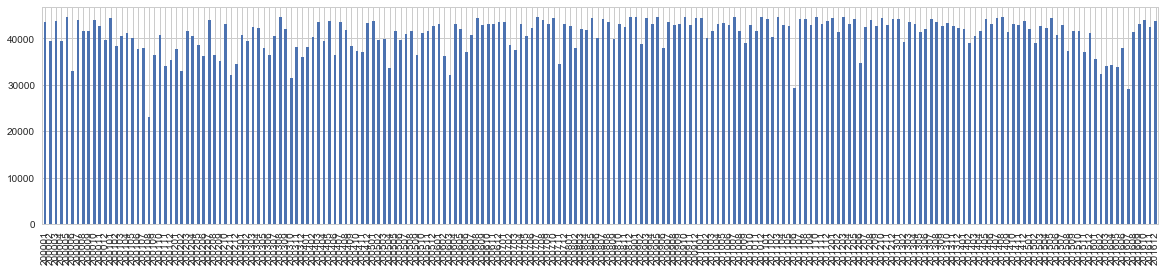

In [15]:
df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [16]:
incre = 10
max_speed = df['speed'].quantile(.99)
max_count = max_count_for_angles(df, 0, 360, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(0, 360, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title='%s (%s - %s), %s' %(angle, start_angle, end_angle, len(sub_df)) )
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANgAAAB6CAYAAADd9J0IAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE3FJREFUeJzt3XdQVOfXB/DvUiwBLBkUTRQVEB3LwiqgDKhjRcUCdkHN
iAUZC+powIKKYCyxxBhQ7CWxMAyYjEZjicpYIwgaxLYWLCjFnyirwMJy3j8c7puVZVnUu7vg+cww
4332ufucu+uZ57l3756VEBGBMSYKE0MHwFhNxgnGmIg4wRgTEScYYyLiBGNMRJxgjInoi0iw4uJi
LF++HF26dEGXLl2wZs0aqFQqrfsoFAoMHjwYeXl5FfZZsmQJ2rRpo/a3fPnyCvvfu3cP/v7+cHJy
gre3NxITEz/6mMpMmjSpXAw7duyosH9SUhJ8fX0hlUoxfPhw/Pvvv8JjJ06cwIIFC6o0fmlpKbZu
3Yo+ffpAJpNh9OjRSE5O1tj37t276NChA65cuaLWfvLkSfTv3x9SqRQTJkxARkaG8FhJSQnWrl0L
T09PODs7Y/LkyXjw4IHO++syvqjoC7Bq1Srq27cvpaSk0IULF8jDw4OioqK07hMREUFbtmzR2mfM
mDEUHR1N2dnZwl9+fr7GvgUFBdS9e3cKCwsjuVxOUVFR1LFjR3r06NFHHxcRUbdu3SghIUEthnfv
3mns++LFC5LJZLRx40aSy+W0bNky6tKlC71+/VroM3z4cLpy5YrO4+/atYvc3Nzo5MmT9PDhQ1q9
ejU5OzvT06dP1fqVlJTQsGHDyNHRkS5fviy037x5kzp06EC//vor3b17l2bOnEleXl5UXFxMREQb
NmygHj160KVLl+jBgwc0Z84c6tWrl/B4ZftXNr7YanyCFRYWkpOTE506dUpoi4+PJ3d3d1KpVBr3
yc7OJmdnZ8rLy9P63G5ubnTu3Dmd4khISCB3d3dSKpVC27hx42jVqlU67a9Jfn4+OTo6klwu16n/
pk2byMfHR9guLS2l3r170759+9TiHDdunM4xDBo0iGJiYtTa+vXrR7t27VJr27x5M/n7+5f7Dx4a
GkrTp08Xtt++fUvOzs70999/ExHRunXr6MSJE8Ljt27dIkdHR3r8+LFO+1c2vthq/BLx1q1bKCgo
gJubm9Dm4uKCly9f4vHjxxr3OXToEGQyGerXr1/h8+bk5CAvLw+tWrXSKY5r165BJpPB3NxcaHN1
dUVKSoqOR1KeXC6HmZkZbG1tdeqfkpICV1dXYVsikaBz585qMfTs2RMpKSm4c+eOTs8ZFhaGIUOG
lGvPz88X/n3v3j3s2bMH4eHhlcb01VdfoX379khNTQUAzJ07F3379gUAvH79Gnv37kXLli3RtGlT
nfavbHyx1fgEy8rKQt26dWFlZSW0NWrUCADw4sULjfucPXsW3bp10/q8crkcEokE27ZtQ48ePTBw
4EDs3LkTpaWlGvtnZ2ejcePGam3W1tbIysqqyuGUi8HS0hKhoaHw9PTE0KFDkZCQUGF/XWKoX78+
OnbsiHPnzukUg5ubG5o0aSJsnz17Fo8ePYK7uzsAQKVSITQ0FMHBwWr9ymRlZWmM6cP3Zvv27XBz
c8ORI0cQHh4OMzMznfavbHyx1fgEKygoQO3atdXaatWqBQBQKpXl+qtUKqSnp8PBwUHr8z548AAm
JiawtbXF1q1bERAQgKioKGzfvr1KcWiKQVf3799HYWEh3N3dsX37dvj4+CAsLAxHjx79pBgcHByQ
lpZW5XjkcjlCQkIwaNAguLi4AHifGJaWlhg9erTGfQoLC3WKycvLC/Hx8fD19UVQUBDu37+v0/6V
jS82M4OMqkd16tQp92aVbdetW7dc/7y8PKhUKjRs2FBomzx5stqVsaNHj8LPzw/e3t5o0KABAKBN
mzZ4/fo1du/ejalTp+ocR506dTTG7e3tjczMTGFb01Jy3rx5mDZtmrCUbdu2LZ48eYJ9+/bB29v7
o2No0KBBuSt1lUlLS8OUKVPQunVrrFixAsD7hNu5cyfi4uIgkUg07ldRTB++N82bNwcALFu2DMnJ
yYiLi0NISIjW/XUZX2w1PsGaNGmCd+/eQaFQwNLSEsD78ycAsLGxKde/7I3471JvxYoVKCwsFLYb
N24MiUQiJFcZBwcH5ObmQqVSwdTUVO0xGxsbYdwyOTk5GmMAgK1bt6KkpETrsZmampY7T7S3t8fZ
s2c19tc1BpVKBRMT3Rc3V69eRWBgIJycnBAdHS0k7PHjx5Gfn1/uHG3KlCnw8fHB8uXLK4zJ1dUV
paWlOHPmDDp06CDEKJFIYG9vj1evXmk9JldXV53GF1uNXyK2bdsWdevWVZuBkpKSYG1trfHiQMOG
DWFmZia8gcD7N7FFixbCn5mZGVasWIGJEyeq7ZuWloaWLVuWSy4AkMlkSElJUUuapKQkyGQyjXF/
++23amNqMmPGDCxatEit7ebNm7Czs9PYXyaTISkpSdgmIuHiy3+9evVKOE+tzO3btzF16lS4uroi
JiZGbeYZN24cjh07hsOHD+Pw4cM4cOAAACAyMhLBwcEaY3r37h3S09Mhk8lgYmKC5cuXIz4+Xnhc
pVLh1q1bwhJe2/66jC86vV2vNKCIiAjq1asXJSUl0cWLF8nDw0PrZ1wjRowod+n5Q5cvX6a2bdtS
TEwMZWRkUEJCAjk7O9Pvv/9ORO8/d8nOzqaCggIiIlIoFOTh4UGhoaEkl8spOjqapFKpcLn5YyQk
JFC7du0oLi6OMjIyaPfu3dS+fXu6evUqEREVFRVRdnY2FRUVERHR8+fPycnJidatW0dyuZzCw8Op
a9eu9ObNG7Xn9fX1pZ07dxLR+8/vsrOzqaSkRGMMPj4+1K9fP3r69GmlnwcqFIpyl8lv3LhB7dq1
o927dwufYw0YMEAYb9u2bdSpUyc6efIkyeVyCg0NJQ8PDyHmyvavbHyxSYiqxxcuK7o7QBdKpRJ7
9uzB5cuXYW5uju7du2PMmDEVLoPi4+Nx7949hISEaH3ef/75B/Hx8Xj+/DkaNmyIwYMHo3fv3gDe
L1OCg4MRGBiIHj16AAAePXqEnTt3IiMjAzY2Nhg3bhykUulHHxcAnDp1CseOHUNubi5sbGwwcuRI
4bJ1eno6IiMjsXjxYrRr1w7A+1l27969yMrKgq2tLSZOnKg247179w6BgYFYs2YNmjZtinPnziEm
JgYbN24sN6u9ePECc+fO1RiXt7c3/P391doKCwsREBCgFg8AXLx4EbGxscjLy0Pr1q0xefJkYUlY
WlqKI0eO4PTp08jLy4OjoyO+++47NGvWTKf9dRn/c+ncuXP5Rr2l8idKSkrS21gvXrwgJycnysnJ
MXgslfncsRw8eJAmTJig1jZlypQKXwsxY/kU+o6lovFq/DnYx7CxsYGvry8OHTpk6FD0iohw4MAB
BAUFCW3Xrl2DiYkJrK2tDRhZ9cUJVoG5c+fizz//1Hqzb01z/PhxODo6omvXrkKbVCrF5s2bDRhV
9VbjL9N/LCsrqwo/sK2pBgwYgAEDBqi1ld0xwT4Oz2CMiYgTjDERcYIxJiJOMMZExAnGmIg4wRgT
EScYYyLiBGNMRJxgjImIE4wxEXGCMSaiSm80U6lUWLx4MR4+fAiJRILw8HDUrl0boaGhkEgkaN26
NZYuXQoTExPExsbi4MGDMDMzQ1BQEHr27InCwkLMnz8fL1++hIWFBVavXo2vv/4aqampWLFiBUxN
TeHp6YkZM2bo43gZ06tKZ7AzZ84AAA4ePIjZs2djw4YNWLlyJWbPno39+/eDiHD69Gnk5ORg3759
OHjwIHbs2IH169dDqVTiwIEDcHR0xP79++Hj44Po6GgAwNKlS7Fu3TocOHAA169fR3p6urhHypgB
VJpgffr0QUR

In [17]:
# Create Output csv

df['HrMn'] = df['time'].apply(lambda x: x[11:15])
df['date'] = df['time'].apply(lambda x: x[3:11])
df['time'] = df['date'].apply(lambda x: x[3:])

# df=df[['stationID','date','HrMn', 'vis','day_type','dir','speed','dir_max','speed_max']]
df=df[['stationID','date','HrMn', 'dir','speed','speed_max']]

In [18]:
# df.to_csv(save_file_dir + '/minute_avg.csv', index=False, float_format='%.2f')

## US 1 min to Hour avg

In [19]:
print(file_dir, convert_type)

TOP 10min_avg


In [20]:
## Output format: date, HrMn, dir, speed, speed_max

if 'df' not in globals():
    df = pd.read_csv(save_file_dir + '/minute_avg.csv', header=0, skipinitialspace=True, dtype={'HrMn': object})

df['date']=pd.to_numeric(df['date'], errors='coerce')
df['speed']=pd.to_numeric(df['speed'], errors='coerce')
df['dir']=pd.to_numeric(df['dir'], errors='coerce')
df = df.dropna()
df=df[['date','HrMn','dir','speed']]
df

,date,HrMn,dir,speed
0,20000101,0000,176,3
1,20000101,0001,170,3
2,20000101,0002,168,3
3,20000101,0003,163,3
4,20000101,0004,150,2
5,20000101,0005,144,1
6,20000101,0006,135,1
7,20000101,0007,118,1
8,20000101,0008,117,1
9,20000101,0009,127,1


In [21]:
df.describe()

,date,dir,speed
count,8.349092e+06,8.349092e+06,8.349092e+06
mean,2.008153e+07,1.796283e+02,6.825871e+00
std,4.846430e+04,1.006750e+02,4.519382e+00
min,2.000010e+07,0.000000e+00,0.000000e+00
25%,2.004061e+07,9.900000e+01,3.000000e+00
50%,2.008091e+07,1.740000e+02,6.000000e+00
75%,2.012101e+07,2.720000e+02,1.000000e+01
max,2.016123e+07,3.590000e+02,5.100000e+01


In [22]:
df['Hr']=df['HrMn'].apply(lambda x: int(str(x)[:-2]))
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

In [23]:
if convert_type != '10min_avg':
    # 1. Hourly avg
    ## This would make all 0 speed in to 0 speed, 0 dir, need more elaborate
    temp_df = df.groupby(['date', 'Hr']).agg({'x' : np.mean,'y': np.mean}).reset_index()
    temp_df['HrMn']=temp_df['Hr'].apply(lambda x: "%02d00"%x)
else:
    # 2. 10 min average
    df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
    temp_df = df.resample(rule='10Min', on='time').mean()
    temp_df['HrMn']=temp_df.index.strftime('%H%M')
    temp_df['date']=temp_df.index.strftime('%Y%m%d').astype(int)
    temp_df = temp_df.reset_index().drop(['time'], 1)

# Regain speed, dir
temp_df['speed']=np.sqrt(temp_df.x**2 + temp_df.y**2)
temp_df['dir']=np.degrees(np.arctan2(temp_df.y, temp_df.x))%360
temp_df.drop(['Hr', 'x','y'], 1, inplace=True)

In [24]:
temp_df.describe()

,date,dir,speed
count,8.942110e+05,836816.000000,836816.000000
mean,2.008067e+07,178.554918,6.761745
std,4.899626e+04,101.713828,4.418841
min,2.000010e+07,0.000000,0.000000
25%,2.004040e+07,97.705847,3.281353
50%,2.008070e+07,173.641467,6.112317
75%,2.012100e+07,272.226632,9.582224
max,2.016123e+07,359.999946,42.729201


### Time Comparison

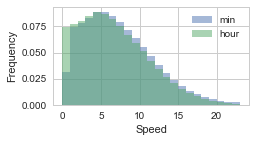

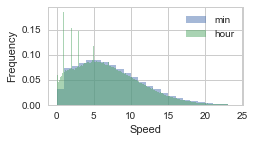

In [25]:
max_speed = df['speed'].quantile(0.999)
bins=arange(0,max_speed)
figsize=(3.5,1.8)

df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=figsize)

plt.figure()
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['speed'].hist(bins=arange(0,max_speed, 0.1), normed=True,alpha=0.5,label='hour')
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=figsize)

In [26]:
# df[(df['time'] > '2016-12-06 00:00:00') & (df['time'] < '2016-12-06 17:00:00')]

In [27]:
temp_df.query('speed == 1')

,date,dir,speed,HrMn
58509,20010210,312.0,1.0,0730
91996,20010930,119.0,1.0,2040
94296,20011016,135.0,1.0,2000
106335,20020108,358.0,1.0,1030
117401,20020326,303.0,1.0,0650
181603,20030615,275.0,1.0,0310
281650,20050509,173.0,1.0,2140
291041,20050714,259.0,1.0,0250
354646,20060928,154.0,1.0,1940
354845,20060930,291.0,1.0,0450


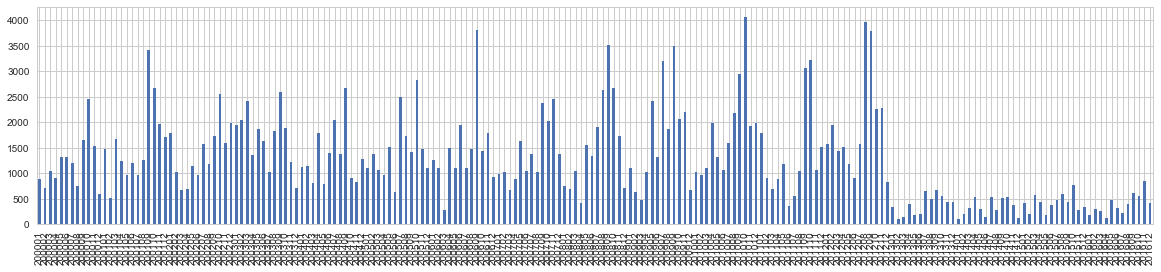

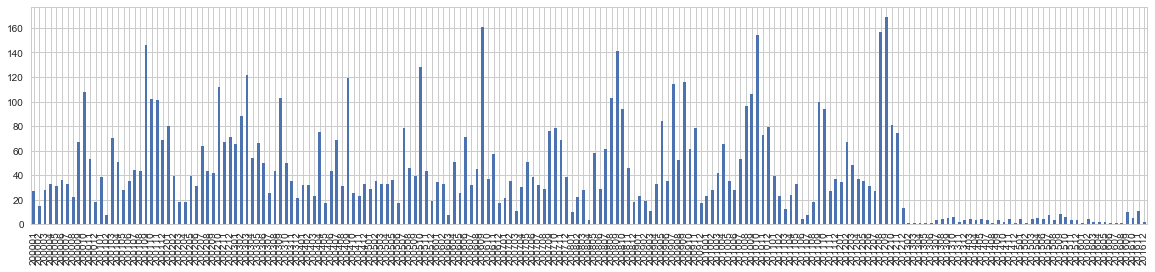

In [28]:
# Check for existance of 0 speed/dir after avg
for df_ in [df, temp_df]:
    plt.figure()
    df_.query('speed == 0')['date'].apply(lambda x: str(x)[0:6]).value_counts().sort_index().plot(kind='bar', figsize=(20,4))

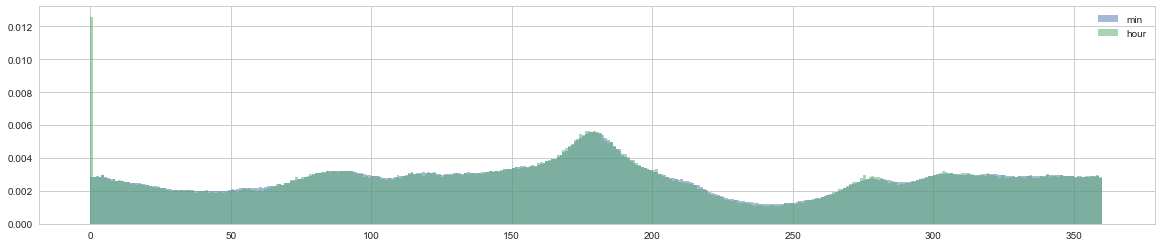

In [29]:
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


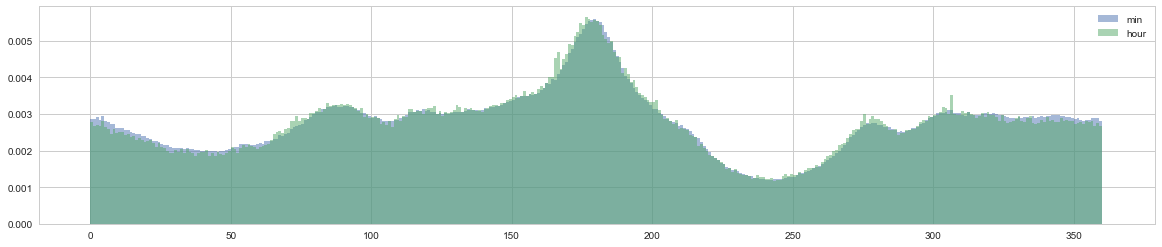

In [30]:
temp_df.ix[(temp_df['dir'] == 0) & (temp_df['speed']==0), 'dir'] =np.nan
temp_df['dir'].interpolate(inplace=True)

bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

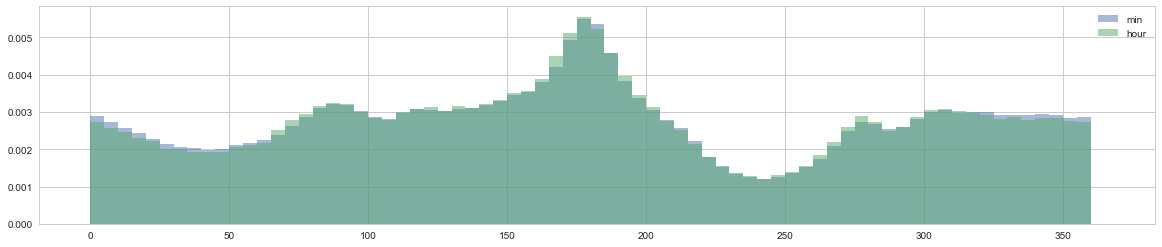

In [31]:
bins=arange(0,370,5)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

### Resample Comparison

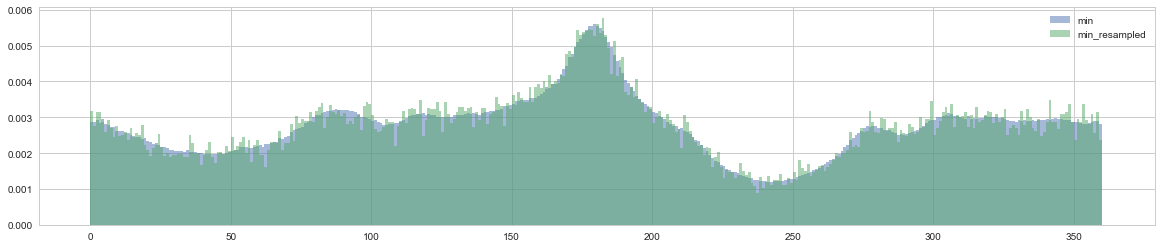

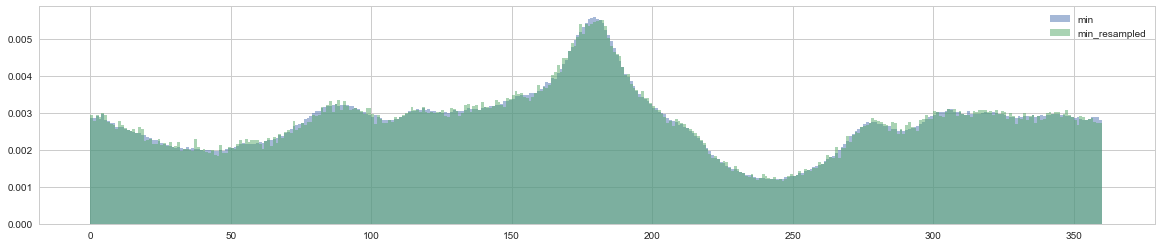

In [32]:
bins=arange(0,362)
for sample_size in [50000, 300000]:
    plt.figure()
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    df.sample(n=sample_size, replace=True)['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min_resampled')
    plt_configure(legend=True, figsize=(20,4))

### Direction Comparison

In [33]:
incre = 10
max_speed = temp_df.speed.max()

for angle in arange(0, 360, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, _ = select_df_by_angle(df, start_angle, end_angle)
    sub_df_hourly, _ = select_df_by_angle(temp_df, start_angle, end_angle)   

    fig = plt.figure()
    bins = arange(0, max_speed)
    sub_df['speed'].hist(bins=bins, alpha=0.5, label='min', normed=True)
    sub_df_hourly['speed'].hist(bins=bins, alpha=0.5, label='hour', normed=True)
    plt.gca().set_xlim([0, max_speed])
    plt_configure(figsize=(3,1.5), legend=True, title='%s (%s - %s), %s/%s' %(angle, start_angle, end_angle, len(sub_df),len(sub_df_hourly)))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANkAAAB6CAYAAAAyNvY2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF+ZJREFUeJztnXtQU1cex7/BKD4AcQfFtooKigrIQ15aLO5iERVdeWiV
qswWitTRKrrrEq0oCBXs6rrWAotQqqJWXRbaXd3VKr5GVFYiVgUqRAFFlIcaILwTzv7BcEtISALk
mgDnM5OZnPf3JPnlPO65v8shhBBQKBTW0NG0AAqlv0ONjEJhGWpkFArLUCOjUFiGGhmFwjLUyCgU
ltG4kbW0tGD37t1wdnaGs7MzvvrqK0gkEoVlRCIRlixZAqFQ2GWenTt3YurUqVKv3bt3d5m/sLAQ
q1atgo2NDTw9PXH9+vUe96mdwMBAGQ3ffvttl/mzs7Ph7e0Na2tr+Pr64sGDB0zaTz/9hG3btnWr
/dbWVhw+fBgffvgh7OzssGLFCvD5fLl5CwoKYGVlhaysLKn4ixcvYsGCBbC2toa/vz9KSkqYNLFY
jH379mHOnDmwtbXFp59+iidPnqhcXpX2AWDFihXIzs5WS38UpXen/rNnz8LHx0dumgxEw8TExBB3
d3eSk5NDMjMziYuLC4mNjVVYJjIykvz9739XmGflypUkLi6OVFRUMK/a2lq5eRsaGoirqysJCwsj
AoGAxMbGkhkzZpDi4uIe94sQQj744AOSnp4upaG+vl5u3pcvXxI7Ozty8OBBIhAISHh4OHF2dibV
1dVMHl9fX5KVlaVy+9999x1xcnIiFy9eJEVFRWTv3r3E1taWlJaWSuUTi8XEx8eHmJubk9u3bzPx
ubm5xMrKihw/fpwUFBSQzz//nHh4eJCWlhZCCCEHDhwgc+fOJbdu3SJPnjwhmzdvJm5ubky6svLK
2ieEkJqaGuLg4EBaWlp63R9l6arWf+PGDWJjY0O8vb1V+h40amSNjY3ExsaGXLp0iYlLS0sjs2fP
JhKJRG6ZiooKYmtrS4RCocK6nZycyLVr11TSkZ6eTmbPnk2am5uZuNWrV5OYmBiVysujtraWmJub
E4FAoFL+Q4cOES8vLybc2tpK5s2bR1JSUqR0rl69WmUNixcvJgkJCVJx8+fPJ999951UXHx8PFm1
apXMj47H45H169cz4bq6OmJra0suX75MCCFk//795KeffmLS8/Pzibm5OXn69KlK5ZW1TwghFy5c
IMHBwWrpj7J0VeqPiYkhlpaWZPHixSobmUani/n5+WhoaICTkxMT5+DggFevXuHp06dyy5w+fRp2
dnYYOXJkl/VWVlZCKBRi0qRJKum4e/cu7OzsMHjwYCbO0dEROTk5KvZEFoFAAC6XCxMTE5Xy5+Tk
wNHRkQlzOBzY29tLafjd736HnJwcPHr0SKU6w8LC8Pvf/14mvra2lnlfWFiIo0ePIiIiQqmm4cOH
w9LSEvfu3QMAbNmyBe7u7gCA6upqHDt2DBMnTsQ777yjUnll7QNAZmYm5syZo5b+KEtXpf7bt2/j
6NGjmD9/vtz65aFRIysvL8ewYcOgr6/PxI0ePRoA8PLlS7llrl69ig8++EBhvQKBABwOB4mJiZg7
dy4WLVqE5ORktLa2ys1fUVGBMWPGSMUZGRmhvLy8O92R0aCnpwcej4c5c+Zg6dKlSE9P7zK/KhpG
jhyJGTNm4Nq1ayppcHJywtixY5nw1atXUVxcjNmzZwMAJBIJeDweNm3aJJWvnfLycrmaOn83SUlJ
cHJywtmzZxEREQEul6tSeWXtA21G9v7776ulP8rSldUPAOnp6bC3t5ertSs0amQNDQ3Q1dWVihsy
ZAgAoLm5WSa/RCJBXl4eJk+erLDeJ0+eQEdHByYmJjh8+DACAgIQGxuLpKSkbumQp0FVHj9+jMbG
RsyePRtJSUnw8vJCWFgYzp071ysNkydPxsOHD7utRyAQIDQ0FIsXL4aDgwOANuPQ09PDihUr5JZp
bGxUSZOHhwfS0tLg7e2NdevW4fHjxyqVV9b+s2fPIJFIYGpqqpb+KEtXVn9P4faqdC8ZOnSozBfW
Hh42bJhMfqFQCIlEglGjRjFxn376qdQO0Llz5/Dxxx/D09MThoaGAICpU6eiuroaR44cwdq1a1XW
MXToULm6PT09UVZWxoTlTSv/9Kc/4bPPPmOmtdOmTcOzZ8+QkpICT0/PHmswNDSU2cFTxsOHDxEU
FIQpU6bgyy+/BND2I0pOTkZqaio4HI7ccl1p6vzdjB8/HgAQHh4OPp+P1NRUhIaGKiyvSvs3btxg
RrHe9keV9hTV3xs0amRjx45FfX09RCIR9PT0ALStpwDA2NhYJn/7h9Nx2vfll1+isbGRCY8ZMwYc
DocxsHYmT56MqqoqSCQSDBo0SCrN2NiYabedyspKuRoA4PDhwxCLxQr7NmjQIJl1o5mZGa5evSo3
v6oaJBIJdHRUn4DcuXMHwcHBsLGxQVxcHGO058+fR21trcwaJCgoCF5eXti9e3eXmhwdHdHa2oor
V67AysqK0cjhcGBmZoY3b94o7JOjo6NK7d+8eRMLFy5US3/GjBmjtD1F9fcKlbZHWKKhoYHY2NiQ
q1evMnFpaWnk/fffl5u/tbWVWFhYSOWXR1RUFPnDH/4gFffNN9+QBQsWyM2flpZGXFxcpLaWV69e
Tb766itVuyLD+vXryfbt26Xitm3bRgIDA+XmP3ToEPH19WXC7buLJ06ckMrH4/HI5s2bVdKQn59P
bG1tydq1a0lTU5NU2ps3b0hxcTHzat8Z/PHHH0lVVRXT1saNG5ky7buD7Z+/q6sriYuLY9LFYjFx
d3cniYmJSssra18sFhMnJyfy+vVrtfRHlf4qqr8zX3/9dd/Ywiek7ZqXm5sbyc7OJjdv3iQuLi4K
r4EtW7ZMZpu1M7dv3ybTpk0jCQkJpKSkhKSnpxNbW1vy448/EkLafgwVFRWkoaGBEEKISCQiLi4u
hMfjEYFAQOLi4oi1tTWzFd0T0tPTiYWFBUlNTSUlJSXkyJEjxNLSkty5c4cQQkhTUxOpqKhgvswX
L14QGxsbsn//fiIQCEhERASZNWsWqampkarX29ubJCcnE0La/qQqKiqIWCyWq8HLy4vMnz+flJaW
Kr1eKBKJZLa079+/TywsLMiRI0eY61wLFy5k2ktMTCQzZ84kFy9eJAKBgPB4POLi4sJoVlZeUfs5
OTnEx8dHrf1Rlt6d+rtjZBqdLgLA1q1b0dTUhLVr12LIkCHw9vZGUFAQAMi92m5ubo5Lly4p3OHh
crnYuHEj/vGPf+Drr7/GqFGj4Ofnh/feew98Ph+VlZXYtGkTgoODMXfuXADA5s2bkZycjKVLl8LY
2BghISGoqKhARUVFj/o1fvx4+Pv749ChQ6iqqoKxsTE2bNgADocDPp+PvLw8REVFYceOHbCwsGA0
HDt2DMnJyTAxMcGWLVtQUFDA1FlfX49ffvkFAQEB4PP5uHbtGhISEnDw4EFmV7adly9fIi8vDwDg
5uYmlebp6YlVq1ZJxbVPuQsKCpjdQQD47LPPkJSUhH379mHKlCnYsGEDswVvY2ODxYsXIzw8HEKh
EObm5ti6dauUZkXlFbWflpYGU1NT5jegrv50ld7d+svKylBfXy9Tr1xUMkUNkZ2dLRP38uVLYmNj
QyorKzWgSBp5+tjk1KlTxN/fXyouKChI7mfxtrV1h/6iTdW8Gj+72F2MjY3h7e2N06dPa1rKW4UQ
gu+//x7r1q1j4u7evQsdHR0YGRlpUBlFGX3OyIC2kwb/+c9/FB4Q7m+cP38e5ubmmDVrFhNnbW2N
+Ph4DaqiqILG12Q9QV9fv8uLur3hzMOzUuGPrBarvY2esnDhQpntbHlrDYr20SdHMgqlL0H/ChWg
zSMbpe9ARzI

2001 - 2005


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


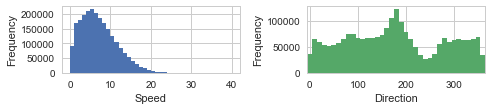

2006 - 2010


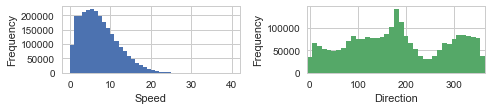

2011 - 2015


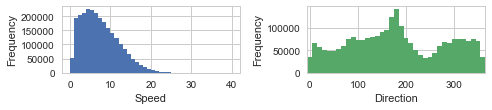

2016 - 2016


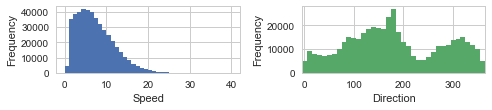

2001 - 2005


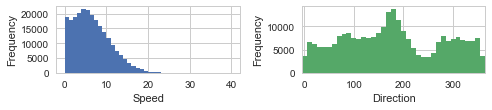

2006 - 2010


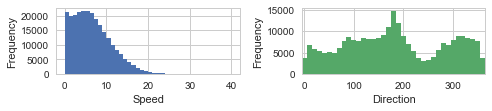

2011 - 2015


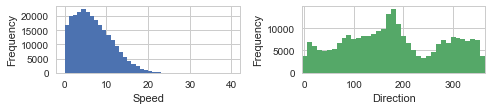

2016 - 2016


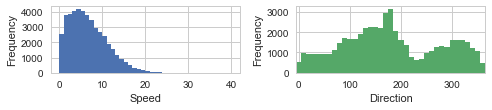

In [34]:
check_time_shift(df)
check_time_shift(temp_df)

In [35]:
import time
current_file = 'file_format.ipynb'
output_file = 'D:/output_HTML/{}_stats_{}.html'.format(file_dir, convert_type) 
save_notebook()
output_HTML(current_file, output_file)

In [36]:
temp_df.to_csv('{}/{}.csv'.format(save_file_dir, convert_type), index=False, float_format='%.2f')

In [37]:
sss

NameError: name 'sss' is not defined



# Portus

In [ ]:
speed_input_file = 'D:/data/speed.json'
dir_input_file = 'D:/data/direction.json'

import json
from pprint import pprint

with open(speed_input_file) as data_file:    
    speed_data = json.load(data_file)

with open(dir_input_file) as data_file:    
    dir_data = json.load(data_file)
# pprint(data)

In [ ]:
speed_df = pd.DataFrame(speed_data["data"][0][0], columns=['timestamp', 'speed'])
dir_df = pd.DataFrame(dir_data["data"][0][0], columns=['timestamp', 'dir'])

In [ ]:
df = pd.merge(speed_df, dir_df, on='timestamp')
df

In [ ]:
df['hr']=df['timestamp']/1000/3600
df['time']=pd.to_datetime('2006-01-01T00:00:00Z')+pd.to_timedelta(df['hr']-315568, unit='h')

In [ ]:
df

In [ ]:
df.sort_values(by='speed')

In [ ]:
df[df.duplicated(subset=['timestamp'])]

In [ ]:
df.drop_duplicates(subset='time', inplace=True)

In [ ]:
df

In [ ]:
save_file = 'D:/data/dat.csv'
df[['time','speed','dir']].to_csv(save_file, index=False)

# US NDBC

## Formatting Files

In [ ]:
from io import StringIO

station_id = '44013'
# '46086', '42057', '46014', 'cdrf1', '46081', '44013'

file_path = 'D:/NDBC/{}'.format(station_id)
fout=StringIO()
fout.write('YY MM DD hh mm dir speed GDR GST GTIME\n')
for time in arange(2000, 2017):
    try:
        file_name = "{}/{}.txt".format(file_path, time)
        for line in open(file_name):
            if 'MM DD' in line or 'mo dy' in line:
                pass
            else:
                fout.write(line)    
    except: 
        print('No data available at {}'.format(time))
        pass
all_data_file = fout.getvalue()
fout.close()

In [ ]:
df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, error_bad_lines=False, sep=' ', 
                 dtype={'YY': object, 'MM': object, 'DD': object, 'hh': object, 'mm': object})
df

In [ ]:
df['date']=df['YY']+df['MM']+df['DD']
df['HrMn']=df['hh']+df['mm']
save_file = "{}/10_min.csv".format(file_path)
df[['date','HrMn','dir','speed']].to_csv(save_file, index=False, float_format='%.2f')

In [ ]:
sss

## Download Files

In [ ]:
import os
import urllib.request 

for station_id in [ '44013']:
#     '46086', '42057', '46014', 'cdrf1', '46081',
    print("http://www.ndbc.noaa.gov/station_history.php?station={}".format(station_id))
    file_path = 'D:/NDBC/{}'.format(station_id)
    if not os.path.exists(file_path):
        os.makedirs(file_path)
    for time in arange(1990, 2017):
        try:
            url = "http://www.ndbc.noaa.gov/view_text_file.php?filename={}c{}.txt.gz&dir=data/historical/cwind/".format(station_id,time)
            file_name = "{}/{}.txt".format(file_path, time)
            urllib.request.urlretrieve(url, file_name)
        except: 
            print('No data available at {}'.format(time))
            pass

In [ ]:
sss

# ECMWF Dataset

In [ ]:
file_path='D:/data/10_metre_U_wind_component_surface.txt'
save_file = 'D:/data/10_U.csv'
df = pd.read_csv(file_path, sep='\t')

In [ ]:
# query_string = 'lat > 47.1 & lat < 48 & lon > 257.1 & lon < 258' 
# query_string = 'lat > 48.1 & lat < 49 & lon > 261.1 & lon < 262' 
# query_string = 'lat >= 48 & lat < 49 & lon > 256.1 & lon <= 257' 
query_string = 'lat >= 28 & lat < 29 & lon > 343 & lon <= 344' 
# query_string = 'lat >= 20 & lat < 21 & lon >=120& lon < 121' 

u_df = df.query(query_string)
u_df

In [ ]:
# temp_df.to_csv(save_file, index=False)

In [ ]:
file_path='D:/data/10_metre_V_wind_component_surface.txt'
save_file = 'D:/data/10_V.csv'
mege_file = 'D:/data/dat.csv'
df = pd.read_csv(file_path, sep='\t')
v_df = df.query(query_string)
# temp_df.to_csv(save_file, index=False)

In [ ]:
df = pd.merge(u_df, v_df, on='time')[['time', 'lat_x', 'lon_x', '10_metre_U_wind_component_surface', '10_metre_V_wind_component_surface']]
df.rename(columns={'10_metre_U_wind_component_surface': 'U', '10_metre_V_wind_component_surface': 'V',
                  'lat_x': 'lat', 'lon_x': 'lat'}, inplace=True)
df

In [ ]:
df.to_csv(mege_file, index=False)

In [ ]:
sss

In [ ]:
# file_path='47N123W.csv'
# file_path='8N293E.csv'
# file_path='./data/ECMWF/chile/52S75W/dat.csv'
# file_path='65N17W.csv'
# file_path='./data/ECMWF/sudan/18N32E/dat.csv'
file_path='./data/ecmwf/china/24N121E/dat.csv'
# file_path='37S142E.csv'

df = pd.read_csv(file_path, header=0, skipinitialspace=True)
df.rename(columns={'U':'x','V':'y'}, inplace=True)
df['speed']=np.sqrt(df.x**2+df.y**2)
df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
df['date']=df['time'].dt.strftime('%Y%m%d')
df['HrMn']=df['time'].dt.strftime('%H00')
df.set_index(['time'], inplace=True)

df

In [ ]:
sub_df =df['2011':'2015']
plot(sub_df.x, sub_df.y, '.', alpha=0.5)

plt.figure()
bins=arange(0,361)
df['dir'].hist(bins=bins)

In [ ]:
np.degrees(np.arctan2(-3, 5))%360

In [ ]:
df.x = -df.x
df.y = -df.y
df['dir']=np.degrees(np.arctan2(df.y, df.x))%360

In [ ]:
sub_df =df['2011':'2015']
df.head()

In [ ]:
plot(sub_df.x, sub_df.y, '.', alpha=0.5)

In [ ]:
bins=arange(0,df.speed.max(),0.5)
df['speed'].hist(bins=bins)

plt.figure()
bins=arange(0,361)
df['dir'].hist(bins=bins)

In [ ]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

In [ ]:
sub_df =df['2011':'2015']
plot(sub_df.x, sub_df.y, '.', alpha=0.5)

In [ ]:
sss

# 2. NDAWN Dataset

In [ ]:
# file_dir = 'D:/NDAWN/fargo/'
# file_dir = 'D:/NDAWN/grand_forks/'
# file_dir = 'D:/NDAWN/williston/'
# file_dir = 'D:/NDAWN/jamestown/'
# file_dir = 'D:/NDAWN/minot/'
file_dir = './data/NDAWN/dickinson/'

file_path = file_dir+'table.csv'
save_file_path  = file_dir+'hr_avg.csv'
df = pd.read_csv(file_path, skipinitialspace=True, dtype={'Year':'object', 'Month':'object', 
                                                          'Day':'object'})
df

In [ ]:
df.describe()

In [ ]:
## Output format: date, HrMn, dir, speed, speed_max
df['HrMn']=df['Hour'].apply(lambda x: "%04d"%x ) 
df['date']=df['Year']+df['Month']+df['Day']
df = df[['date','HrMn','Avg Wind Speed', 'Max Wind Speed', 'Avg Wind Dir', 'Avg Wind Dir SD']]
df.rename(columns={'Avg Wind Speed': 'speed', 'Max Wind Speed': 'speed_max', 
                   'Avg Wind Dir': 'dir', 'Avg Wind Dir SD': 'dir_std'}, inplace=True)

In [ ]:
df

In [ ]:
## too slow, need optimization
import datetime as dt

def my_to_datetime(date_str):
    if date_str[8:10] != '24':
        return pd.to_datetime(date_str, format='%Y%m%d%H%M')

    date_str = date_str[0:8] + '00' + date_str[10:]
    return pd.to_datetime(date_str, format='%Y%m%d%H%M') + \
           dt.timedelta(days=1)
   
df['time']=df["date"].astype(str).map(str)+df["HrMn"]
df['time']=df['time'].apply(my_to_datetime)
df['date']=df['time'].apply(lambda x: x.strftime('%Y%m%d'))
df['HrMn']=df['time'].apply(lambda x: x.strftime('%H%M'))

In [ ]:
df.speed.value_counts().sort_index()

In [ ]:
bins=arange(0,df['speed'].max())
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True)

plt.figure()
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True, figsize=(20,4))

In [ ]:
df.to_csv(save_file_path, index=False, float_format='%.2f')

In [ ]:
sss

# 3. Read from Chinese Data sets

In [ ]:
import csv

ipath= "./data/NCDC/cn/上海/上海/dat.txt"
uipath = unicode(ipath , "utf8")

with open(uipath) as fin, open('./data/NCDC/test.txt', 'w') as fout:
    o=csv.writer(fout)
    for line in fin:
        o.writerow(line.split())